In [30]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

# **1. Analisis de Facturaci√≥n**

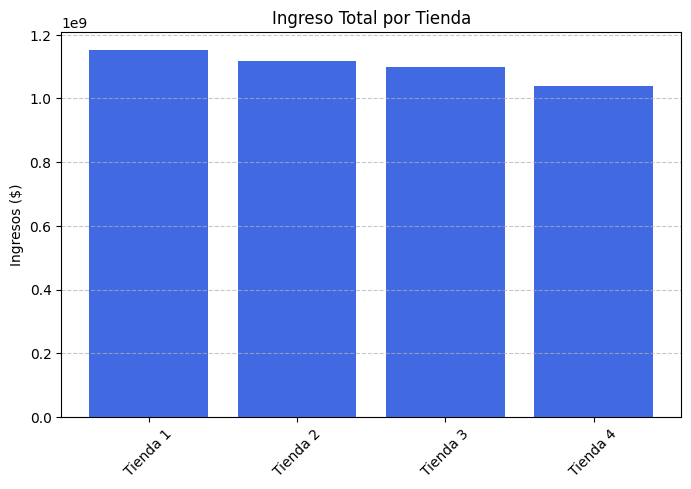

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


In [31]:
Tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4,
} # Agrupamos las tiendas en un diccionario

ingresos = {nombre: df["Precio"].sum() for nombre, df in Tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(ingresos.keys(), ingresos.values(), color="royalblue")
plt.title("Ingreso Total por Tienda")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for nombre, ingreso in ingresos.items():
    print(f"{nombre}: ${ingreso:,.2f}")

# 2 Ventas por Categor√≠a

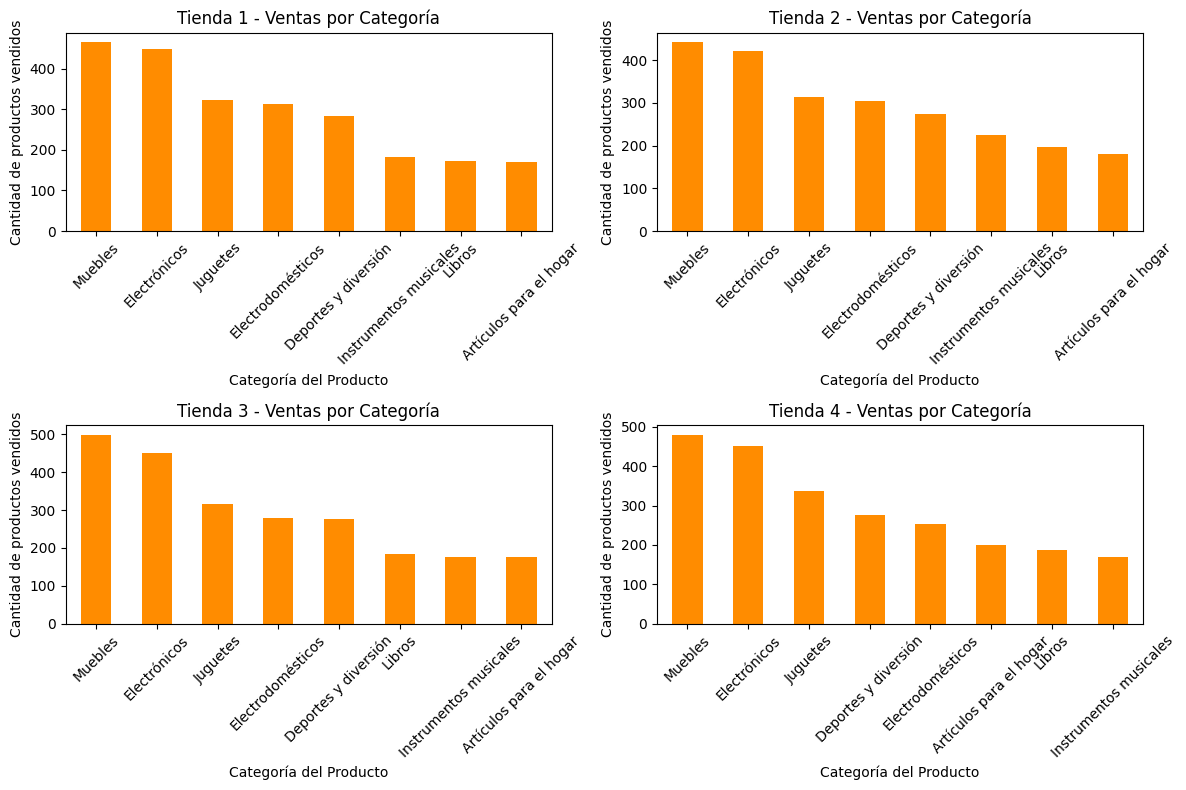

In [32]:
plt.figure(figsize=(12, 8))

for i, (nombre, df) in enumerate(Tiendas.items(), 1):
    plt.subplot(2, 2, i)
    categoria = df["Categor√≠a del Producto"].value_counts()
    categoria.plot(kind='bar', color='darkorange')
    plt.title(f"{nombre} - Ventas por Categor√≠a")
    plt.ylabel("Cantidad de productos vendidos")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Calificaci√≥n promedio de la tienda

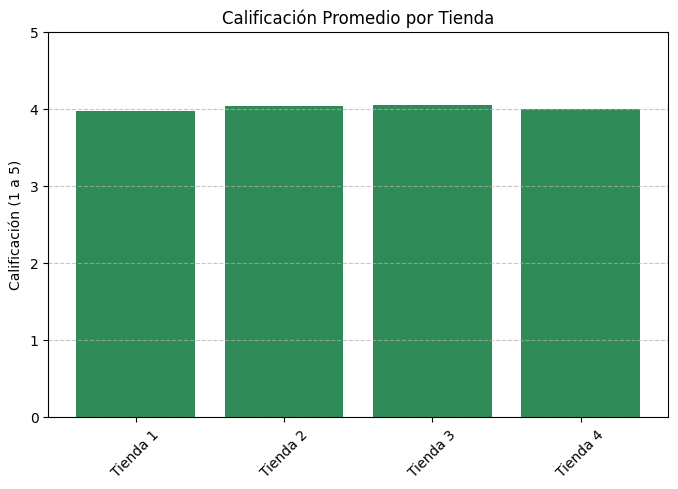

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


In [33]:
calificaciones = {nombre: df["Calificaci√≥n"].mean() for nombre, df in Tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(calificaciones.keys(), calificaciones.values(), color="seagreen")
plt.title("Calificaci√≥n Promedio por Tienda")
plt.ylabel("Calificaci√≥n (1 a 5)")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for nombre, calif in calificaciones.items():
    print(f"{nombre}: {calif:.2f}")


# 4. Productos M√°s y Menos Vendidos

In [34]:
for nombre, df in Tiendas.items():
    producto_counts = df["Producto"].value_counts()
    mas_vendido = producto_counts.idxmax()
    menos_vendido = producto_counts.idxmin()

    print(f"{nombre}")
    print(f"üìà Producto m√°s vendido: {mas_vendido} ({producto_counts.max()} ventas)")
    print(f"üìâ Producto menos vendido: {menos_vendido} ({producto_counts.min()} venta/s)\n")


Tienda 1
üìà Producto m√°s vendido: Microondas (60 ventas)
üìâ Producto menos vendido: Auriculares con micr√≥fono (33 venta/s)

Tienda 2
üìà Producto m√°s vendido: Iniciando en programaci√≥n (65 ventas)
üìâ Producto menos vendido: Juego de mesa (32 venta/s)

Tienda 3
üìà Producto m√°s vendido: Kit de bancas (57 ventas)
üìâ Producto menos vendido: Bloques de construcci√≥n (35 venta/s)

Tienda 4
üìà Producto m√°s vendido: Cama box (62 ventas)
üìâ Producto menos vendido: Guitarra el√©ctrica (33 venta/s)



# 5. Env√≠o promedio por tienda

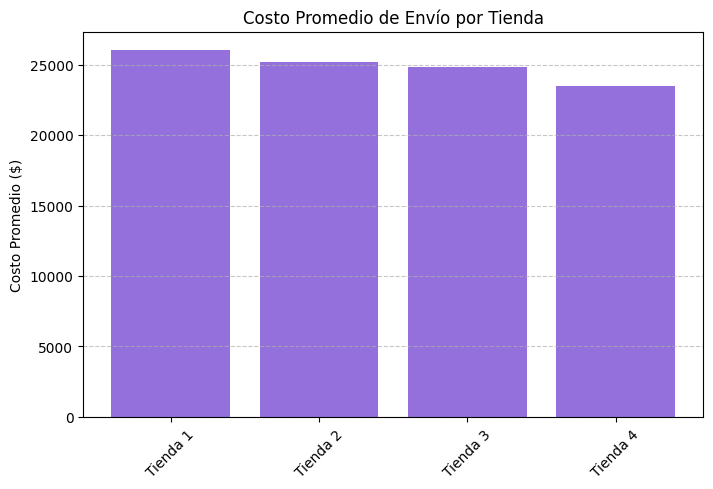

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


In [35]:
envios = {nombre: df["Costo de env√≠o"].mean() for nombre, df in Tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(envios.keys(), envios.values(), color="mediumpurple")
plt.title("Costo Promedio de Env√≠o por Tienda")
plt.ylabel("Costo Promedio ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for nombre, costo in envios.items():
    print(f"{nombre}: ${costo:.2f}")

# Recomendaci√≥n de Tienda para Vender

In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# comparaci√≠on
resumen = pd.DataFrame({
    "Ingresos": ingresos,
    "Calificaci√≥n Promedio": calificaciones,
    "Costo Env√≠o Promedio": envios
})

# ingresos y calificaci√≥n: m√°s alto = mejor, env√≠o: m√°s bajo = mejor
scaler = MinMaxScaler()
resumen_norm = resumen.copy()
resumen_norm["Ingresos"] = scaler.fit_transform(resumen[["Ingresos"]])
resumen_norm["Calificaci√≥n Promedio"] = scaler.fit_transform(resumen[["Calificaci√≥n Promedio"]])
resumen_norm["Costo Env√≠o Promedio"] = 1 - scaler.fit_transform(resumen[["Costo Env√≠o Promedio"]])  # inverso

# Pesos cada factor
pesos = {
    "Ingresos": 0.5,
    "Calificaci√≥n Promedio": 0.3,
    "Costo Env√≠o Promedio": 0.2
}

# Puntuaci√≥n final
resumen_norm["Puntaje Final"] = (
    resumen_norm["Ingresos"] * pesos["Ingresos"] +
    resumen_norm["Calificaci√≥n Promedio"] * pesos["Calificaci√≥n Promedio"] +
    resumen_norm["Costo Env√≠o Promedio"] * pesos["Costo Env√≠o Promedio"]
)

# Ordenar por puntuaci√≥n
resumen_ordenado = resumen_norm.sort_values(by="Puntaje Final", ascending=False)

# Resultados
print("‚úîÔ∏è Recomendaci√≥n de Tienda para Vender:\n")
for i, (tienda, fila) in enumerate(resumen_ordenado.iterrows(), 1):
    print(f"{i}. {tienda} ‚Äî Puntaje: {fila['Puntaje Final']:.3f}")

# Mejor tienda
mejor_tienda = resumen_ordenado.index[0]
print(f"\n‚úîÔ∏è Recomendaci√≥n final: Vender principalmente en {mejor_tienda} por tener el mejor balance entre facturaci√≥n, calificaci√≥n y log√≠stica.")


‚úîÔ∏è Recomendaci√≥n de Tienda para Vender:

1. Tienda 2 ‚Äî Puntaje: 0.663
2. Tienda 3 ‚Äî Puntaje: 0.660
3. Tienda 1 ‚Äî Puntaje: 0.500
4. Tienda 4 ‚Äî Puntaje: 0.280

‚úîÔ∏è Recomendaci√≥n final: Vender principalmente en Tienda 2 por tener el mejor balance entre facturaci√≥n, calificaci√≥n y log√≠stica.
